# Exploratory Data Analysis

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

In [18]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [19]:
print('train shape', train_data.shape)
print('test shape', test_data.shape)

train shape (16794, 2)
test shape (3000, 2)


In [20]:
train_data.head()

,feature,label
0,72A75G72H71O74S75P76J72M72V80J76G75V73Y72H78I7...,class_1
1,89V89I95A91T89Q93V89V90F92U92D93N92V90U87N92F9...,class_1
2,90M89S90O90C91M93O95A90T92T95H92J91W93A87O90P9...,class_2
3,82O80L81A76O86T85F82T81H78I86X85N82Q82F85G85F8...,class_2
4,58V55Y54M54O59Q56H60B57L56W60B60A60G61F60Q61K5...,class_2


In [21]:
test_data.head()

,Unnamed: 0,feature
0,0,66R67U64Y58R65T70I70R65N65U72O69S68N66R71Y69A6...
1,1,22D25S17A21G21O21N26E25F21N23H25E26Q23G21C21O2...
2,2,81I84T82K82V83L87U84O83R84W84R84V80Q85P86D83F8...
3,3,27R31P23J24X23X27C28A27G25P29K27L30E27M25Q26T2...
4,4,35L38O29O35J32J33V34Y35Y35X39S34B38X37J38K38N3...


In [22]:
# Duplicates?
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [23]:
# Target variables count - train data, model baseline
train_data['label'].value_counts() / len(train_data)

class_1    0.359355
class_3    0.325235
class_2    0.315410
Name: label, dtype: float64

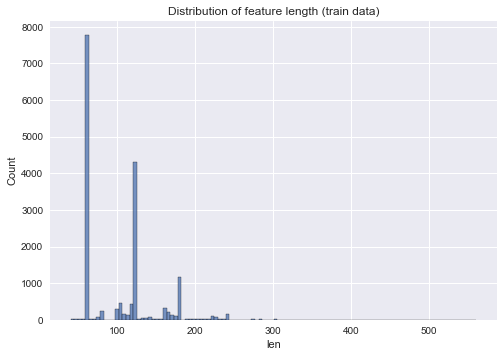

In [24]:
# Length of features - train data
train_data['len'] = train_data['feature'].apply(len)
sns.histplot(train_data['len'])
plt.title('Distribution of feature length (train data)')
plt.show()

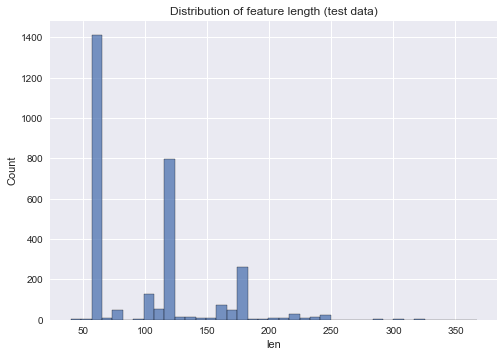

In [25]:
# Length of features - test data
test_data['len'] = test_data['feature'].apply(len)
sns.histplot(test_data['len'])
plt.title('Distribution of feature length (test data)')
plt.show()

In [26]:
# top 10 length - train data
train_data['len'].value_counts()[:10] / len(train_data)

60     0.459569
121    0.255270
182    0.056449
101    0.016196
162    0.013517
103    0.010063
80     0.009825
120    0.009527
106    0.006967
164    0.006312
Name: len, dtype: float64

In [27]:
# top 10 length - test data
test_data['len'].value_counts()[:10]/ len(test_data)

60     0.467000
121    0.243333
182    0.067333
101    0.019000
162    0.010333
80     0.009000
120    0.009000
103    0.007000
164    0.006667
181    0.006333
Name: len, dtype: float64

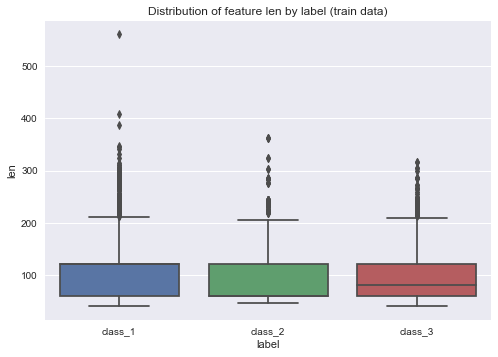

In [28]:
# distribution of feature length by target label - train data
sns.boxplot(x=train_data['label'], y=train_data['len'])
plt.title('Distribution of feature len by label (train data)')
plt.show()

In [29]:
# Summary stats of feature len by labels - train data
train_data.groupby('label')['len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
class_1,6035.0,110.442751,52.393524,40.0,60.0,121.0,121.0,561.0
class_2,5297.0,94.358694,44.861785,47.0,60.0,60.0,121.0,362.0
class_3,5462.0,98.389967,44.302008,41.0,60.0,80.0,121.0,316.0


In [30]:
# chunks of text in labels - train data
train_data['chunks'] = train_data['feature'].apply(lambda x: len(x.split(' ')))
train_data['chunks'].value_counts() / len(train_data)

1     0.487555
2     0.354650
3     0.124687
4     0.027272
5     0.004645
6     0.000893
7     0.000238
12    0.000060
Name: chunks, dtype: float64

In [31]:
# chunks of text in labels - test data
test_data['chunks'] = test_data['feature'].apply(lambda x: len(x.split(' ')))
test_data['chunks'].value_counts() / len(test_data)

1    0.491000
2    0.337667
3    0.135000
4    0.031333
5    0.003333
6    0.001333
7    0.000333
Name: chunks, dtype: float64

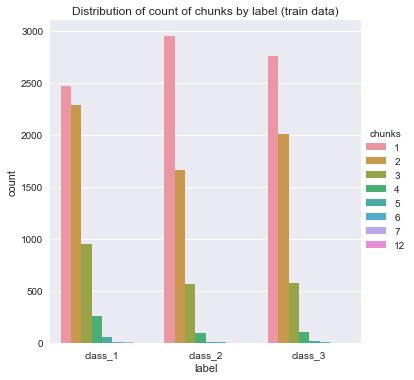

In [32]:
# Distribution of count of chunks by label (train data) 
temp_data = train_data.groupby(['label','chunks'])['feature'].count().reset_index()
sns.catplot(data=temp_data, 
            kind="bar",
            x="label", 
            y="feature", 
            hue="chunks")
plt.title('Distribution of count of chunks by label (train data)')
plt.ylabel('count')
plt.show()